# BioDynamICS: Data Exploration

This notebook performs initial data exploration on the MIMIC-III demo dataset to understand its structure and characteristics.

In [24]:
from IPython.display import display, Javascript

def toggle_hidden_cells(state):
    display(Javascript(f"""
    var hidden_cells = document.querySelectorAll('.cell .input + div[data-hidden]');
    hidden_cells.forEach(function(cell) {{
        cell.style.display = '{state}';
    }});
    """))

# Set 'block' to show all cells or 'none' to hide all cells
toggle_hidden_cells('block')



<IPython.core.display.Javascript object>

In [25]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Add the parent directory to path so we can import our modules
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Import our data integration module
from src.data_integration import MimicPatientIntegrator

In [26]:
# Configure visualization settings
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['font.size'] = 12

In [27]:
# Initialize data integrator
data_path = data_path = r"C:\Users\alex5\Documents\Projects\MIMIC- III\biodynimcs\data\mimic-iii-clinical-database-demo-1.4"
mimic = MimicPatientIntegrator(data_path)

# Load core tables
patient_stays = mimic.load_core_tables()

[2025-03-14 17:26:15] Initialized MimicPatientIntegrator
[2025-03-14 17:26:15] Loaded PATIENTS: 100 rows
[2025-03-14 17:26:15] Loaded ADMISSIONS: 129 rows
[2025-03-14 17:26:15] Loaded ICUSTAYS: 136 rows
[2025-03-14 17:26:15] Created patient stays table: 136 rows


In [28]:
# Load CHARTEVENTS in chunks (since it's large)
print("Loading CHARTEVENTS in chunks...")
chartevents = mimic.load_chartevents_chunked(chunk_size=10000)

# Load all other available tables
available_tables = [
    "LABEVENTS", "PRESCRIPTIONS", "MICROBIOLOGYEVENTS", 
    "OUTPUTEVENTS", "INPUTEVENTS_CV", "INPUTEVENTS_MV", 
    "PROCEDURES_ICD", "DIAGNOSES_ICD", "DATETIMEEVENTS",
    "CPTEVENTS", "TRANSFERS", "SERVICES", "DRGCODES"
]

# Load each table
for table in available_tables:
    print(f"Loading {table}...")
    mimic.load_table(table)

Loading CHARTEVENTS in chunks...
[2025-03-14 17:26:18] Processing CHARTEVENTS.csv (74.1 MB)
[2025-03-14 17:26:18] Processed chunk 1 with 10000 rows. Total: 10000 rows
[2025-03-14 17:26:18] Processed chunk 2 with 10000 rows. Total: 20000 rows
[2025-03-14 17:26:18] Processed chunk 3 with 10000 rows. Total: 30000 rows
[2025-03-14 17:26:18] Processed chunk 4 with 10000 rows. Total: 40000 rows
[2025-03-14 17:26:18] Processed chunk 5 with 10000 rows. Total: 50000 rows
[2025-03-14 17:26:18] Processed chunk 6 with 10000 rows. Total: 60000 rows
[2025-03-14 17:26:18] Processed chunk 7 with 10000 rows. Total: 70000 rows
[2025-03-14 17:26:18] Processed chunk 8 with 10000 rows. Total: 80000 rows
[2025-03-14 17:26:18] Processed chunk 9 with 10000 rows. Total: 90000 rows
[2025-03-14 17:26:18] Processed chunk 10 with 10000 rows. Total: 100000 rows
[2025-03-14 17:26:18] Processed chunk 11 with 10000 rows. Total: 110000 rows
[2025-03-14 17:26:18] Processed chunk 12 with 10000 rows. Total: 120000 rows
[2

C:\Users\alex5\Documents\Projects\MIMIC- III\biodynimcs\src\data_integration.py:42: DtypeWarning: Columns (17,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  self.tables[table_name] = pd.read_csv(file_path)


## Exploring Patient Demographics

In [29]:
# Get basic demographics
patients = mimic.tables['PATIENTS']

# Show the first few rows
patients.head()

,row_id,subject_id,gender,dob,dod,dod_hosp,dod_ssn,expire_flag
0,9467,10006,F,2094-03-05 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,1
1,9472,10011,F,2090-06-05 00:00:00,2126-08-28 00:00:00,2126-08-28 00:00:00,NaN,1
2,9474,10013,F,2038-09-03 00:00:00,2125-10-07 00:00:00,2125-10-07 00:00:00,2125-10-07 00:00:00,1
3,9478,10017,F,2075-09-21 00:00:00,2152-09-12 00:00:00,NaN,2152-09-12 00:00:00,1
4,9479,10019,M,2114-06-20 00:00:00,2163-05-15 00:00:00,2163-05-15 00:00:00,2163-05-15 00:00:00,1


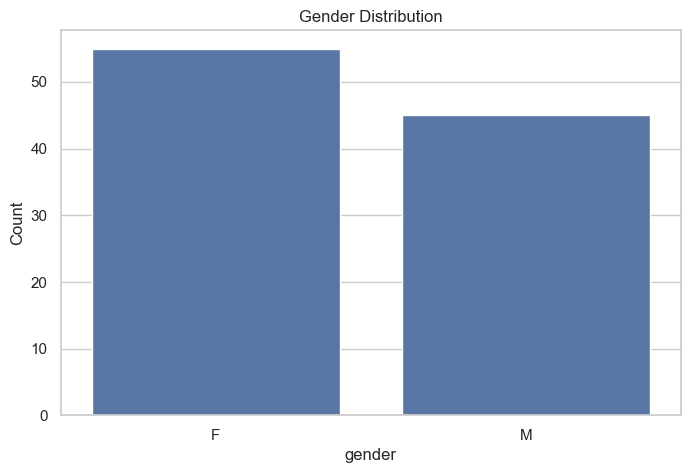

In [30]:
# Gender distribution
gender_counts = patients['gender'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Gender Distribution')
plt.ylabel('Count')
plt.show()

In [31]:
# Create a single patient timeline as an example
# Choose the first patient ID
sample_patient_id = patients['subject_id'].iloc[0]
patient_timeline = mimic.create_patient_timeline(sample_patient_id)

# Print patient info
print("Patient Information:")
for key, value in patient_timeline['info'].items():
    print(f"{key}: {value}")

[2025-03-14 17:31:09] Created timeline for patient 10006 with 2937 events
Patient Information:
subject_id: 10006
gender: F
dob: 2094-03-05 00:00:00
dod: 2165-08-12 00:00:00
expire_flag: 1
admissions: 1
icustays: 1


Event type distribution:
event_type
lab           1963
chart          920
medication      54
Name: count, dtype: int64


<Figure size 1400x600 with 0 Axes>

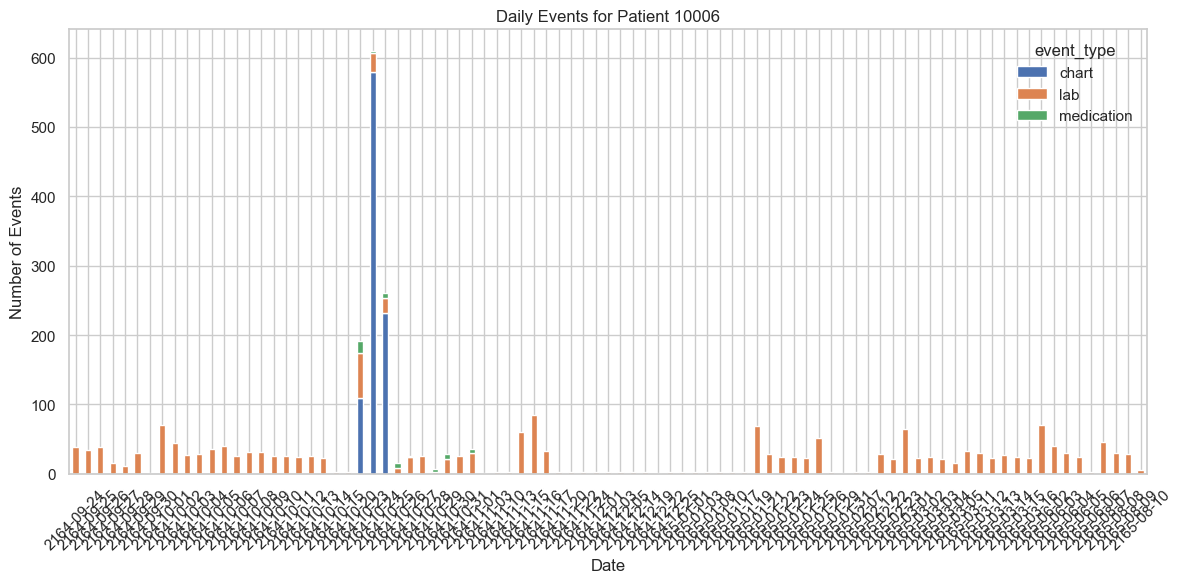

In [32]:
# Examine timeline events
timeline = patient_timeline['timeline']
if not timeline.empty:
    # Count event types
    event_counts = timeline['event_type'].value_counts()
    print("Event type distribution:")
    print(event_counts)
    
    # Plot event distribution over time
    plt.figure(figsize=(14, 6))
    
    # Get the event counts per day
    timeline['date'] = timeline['measurement_time'].dt.date
    daily_counts = timeline.groupby(['date', 'event_type']).size().unstack().fillna(0)
    
    daily_counts.plot(kind='bar', stacked=True)
    plt.title(f'Daily Events for Patient {sample_patient_id}')
    plt.ylabel('Number of Events')
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No timeline events found for this patient")